In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [67]:
# Step 1: Load and preprocess the dataset
data = pd.read_csv('cleaned_data.csv')

In [68]:
data.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Polarity,Subjectivity,Sentiment Label
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.073675,0.356294,Positive
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.550000,0.625000,Positive
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.512891,0.568750,Positive
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,0.178750,0.533125,Positive
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,0.133750,0.607778,Positive


In [69]:
data = data[['Clothing ID', 'Age', 'Recommended IND', 'Review Text', 'Rating']]
data.dropna(subset=['Review Text'], inplace=True)
data.reset_index(drop=True, inplace=True)
data['Review Text'] = data['Review Text'].str.lower()

In [70]:
# Step 2: Create the item-user matrix
item_user_matrix = data.pivot_table(index='Clothing ID', columns='Age', values='Rating', fill_value=0)
item_user_matrix = item_user_matrix.to_numpy()

In [71]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Assuming 'data' DataFrame contains the necessary data with columns 'Clothing ID', 'Age', and 'Rating'

# Step 1: Get the item IDs from the 'Clothing ID' column in the 'data' DataFrame
item_ids = data['Clothing ID'].unique()

# Step 2: Create the item-user matrix using pivot_table
item_user_matrix = data.pivot_table(index='Clothing ID', columns='Age', values='Rating', fill_value=0)

# Convert the pivot table to a NumPy array for cosine similarity
item_user_matrix = item_user_matrix.to_numpy()

# Step 3: Calculate cosine similarity
item_similarity = cosine_similarity(item_user_matrix)

# Convert the similarity matrix into a DataFrame with row and column labels
item_similarity_df = pd.DataFrame(
    item_similarity,
    index=item_ids,
    columns=item_ids
)

# Print the item similarity DataFrame
print(item_similarity_df)



          1077      1049      847   1080  858       1095      767   1065  \
1077  1.000000  0.000000  0.000000   0.0   0.0  0.148478  0.000000   0.0   
1049  0.000000  1.000000  1.000000   0.0   0.0  0.000000  0.000000   0.0   
847   0.000000  1.000000  1.000000   0.0   0.0  0.000000  0.000000   0.0   
1080  0.000000  0.000000  0.000000   1.0   1.0  0.000000  0.000000   0.0   
858   0.000000  0.000000  0.000000   1.0   1.0  0.000000  0.000000   0.0   
...        ...       ...       ...   ...   ...       ...       ...   ...   
630   0.272166  0.000000  0.000000   0.0   0.0  0.000000  0.000000   0.0   
181   0.000000  0.302372  0.302372   0.0   0.0  0.000000  0.000000   0.0   
721   0.000000  0.000000  0.000000   0.0   0.0  0.000000  0.421076   0.0   
262   0.000000  0.000000  0.000000   1.0   1.0  0.000000  0.000000   0.0   
522   0.000000  0.000000  0.000000   0.0   0.0  0.000000  1.000000   0.0   

      853       1120  ...      227       487       387   640       345   \
1077   0.0  

In [72]:
# Step 4: Feature engineering - Process text data for 'Review Text'
vectorizer = CountVectorizer(stop_words='english')
review_matrix = vectorizer.fit_transform(data['Review Text'])
review_similarity = cosine_similarity(review_matrix)
review_similarity_df = pd.DataFrame(review_similarity, index=data.index, columns=data.index)

In [73]:
# Step 5: Combine the similarity matrices using weighted average (you can adjust the weights as needed)
alpha = 0.7
combined_similarity = alpha * item_similarity_df + (1 - alpha) * review_similarity_df

Recommendations for Clothing ID 420
       Clothing ID                                        Review Text  Rating
768            154  i love the design and pattern of this top. it ...       4
1555           371  cute and very soft, but the elastic wasn't sew...       1
2349          1093  i was very excited about receiving this dress....       3
8260           794  i love this sweatshirt. it's super chic and se...       4
10871          808  i love this! very comfortable & cute dress. tr...       5


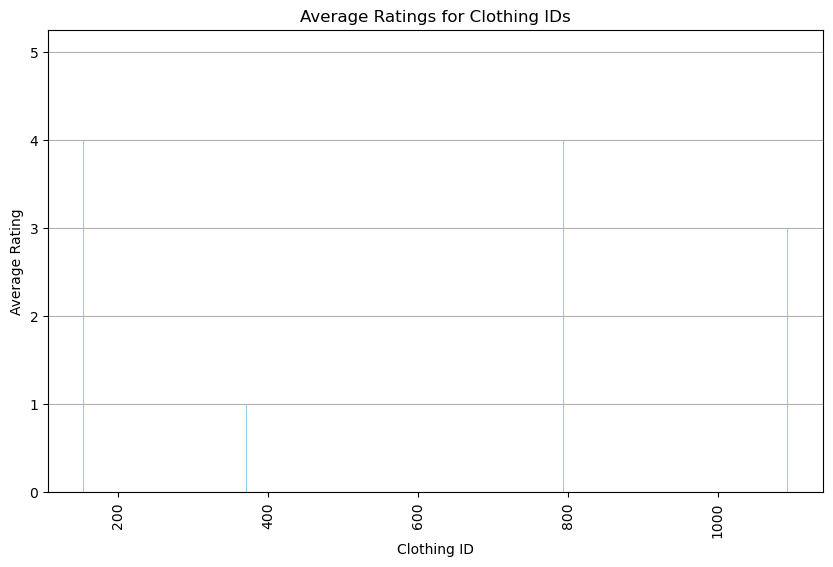

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Assuming you have the 'recommendations' DataFrame, drop duplicate Clothing IDs as you've already done.
recommendations = recommendations.drop_duplicates(subset='Clothing ID', keep='first')

# Step 2: Print the recommendations for the specific item (replace 'clothing_id' with the actual item you want)
clothing_id = 420
print("Recommendations for Clothing ID", clothing_id)
print(recommendations[['Clothing ID', 'Review Text', 'Rating']])

# Step 3: Group the DataFrame by 'Clothing ID' and calculate the average rating for each unique Clothing ID.
average_ratings = recommendations.groupby('Clothing ID')['Rating'].mean().reset_index()

# Step 4: Create a bar plot to visualize the average ratings for each unique Clothing ID.
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(average_ratings['Clothing ID'], average_ratings['Rating'], color='skyblue')
plt.xlabel('Clothing ID')
plt.ylabel('Average Rating')
plt.title('Average Ratings for Clothing IDs')
plt.xticks(rotation=90)  # Rotate the x-axis labels if there are many Clothing IDs
plt.grid(axis='y')  # Add horizontal grid lines
plt.show()
